# Stock Price Prediction Model

### Import Packages

In [2]:
# Install yfinance (Yahoo Finance market data downloader) 
!pip install yfinance

In [3]:
# Import external packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


### Observations - Extract Data from Yahoo Finance

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

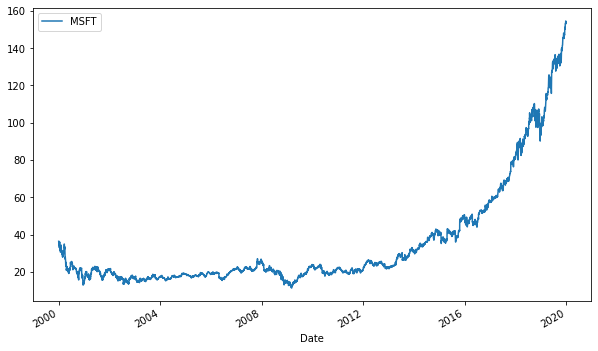

In [4]:
# Extract data from Yahoo Finance
ticker = 'MSFT'
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start ='2000-1-1', end ='2019-12-31')['Adj Close']

# Plot MSFT closing prices
stock_data.plot(figsize=(10, 6))

### Distributions - Calculate Historical Returns and Statistical Measures

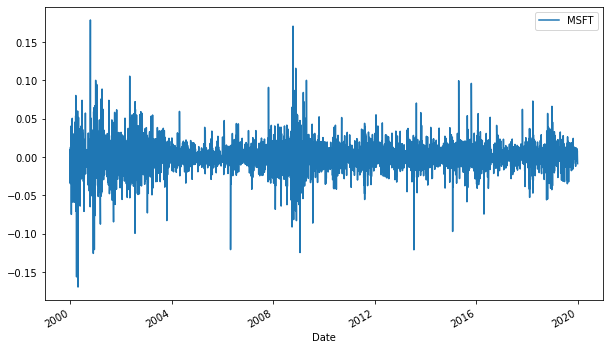

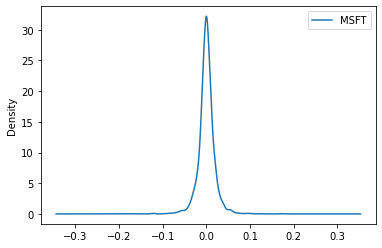

In [5]:
# Calculate historical log returns
log_returns = np.log(1 + stock_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (10, 6));

# Show the distribution of the log returns
log_returns.plot.density();

In [6]:
# Calculate key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

### Simulations - Simulate Future Daily Returns and Future Prices

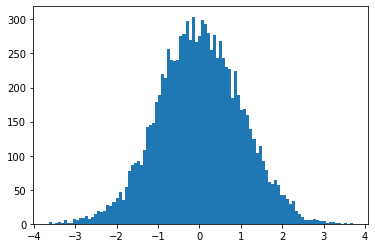

In [7]:
# How to generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Use those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100);

In [8]:
# Simulate future daily returns using the above method
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [9]:
# Using returns, calculate future price progression in each simulation

# Latest known stock price for MSFT
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list

array([[153.20622253, 153.20622253, 153.20622253, ..., 153.20622253,
        153.20622253, 153.20622253],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

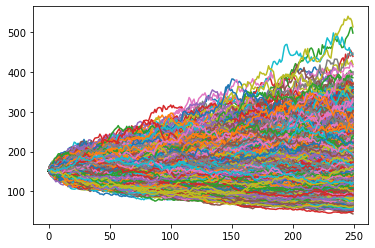

In [10]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_simplereturns_simulated[t]

# Plot simulated future MSFT prices
plt.plot(price_list);


### Including Drift

In [11]:
# Calculate drift
drift = mean - (0.5*variance)

# Simulate future daily returns
t_intervals =  250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)


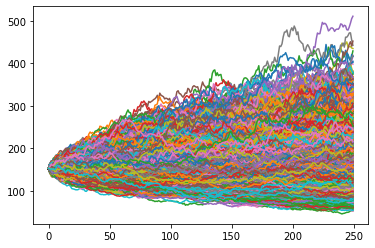

In [13]:
# Create a variable for the latest price of MSFT
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)

# Set the first row to the starting stock price
price_list[0] = last_price

# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_simplereturns_simulated_withdrift[t]

# Plot simulated future MSFT prices
plt.plot(price_list);


### Quantifications - Examine the worst, average, best scenarios and the probability distribution

In [14]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(), 2)
AvgSim = round(price_list[-1].mean(), 2)
BestSim = round(price_list[-1].max(), 2)

# Examine the worst, average, and best stock price sceanrios
print("Best and Worst Cases")
print(f"Worst simulation $/share: {WorstSim}")
print(f"Average simulation $/share: {AvgSim}")
print(f"Best simulation $/share: {BestSim}")




# Set up confidence intervals
mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = mean_Day250Prices + 1 * SD_Day250Prices
LowerInterval_1SD = mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = mean_Day250Prices - 2 * SD_Day250Prices


# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${round(LowerInterval_1SD,2)} and ${round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(LowerInterval_2SD,2)} and ${round(UpperInterval_2SD,2)}")

Best and Worst Cases
Worst simulation $/share: 52.28
Average simulation $/share: 163.83
Best simulation $/share: 510.99

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $114.02 and $213.65
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $64.21 and $263.46
